In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 高级处理-交叉表与透视表

In [2]:
data = pd.read_csv("../data/stock_day.csv")

## 数据准备

In [3]:
# 寻找星期几跟股票张得的关系
# 1、先把对应的日期找到星期几
date = pd.to_datetime(data.index).weekday
data['week'] = date
data[:5]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2


In [4]:
# 2、假如把p_change按照大小去分个类0为界限  0代表跌,1代表涨
data['posi_neg'] = np.where(data['p_change'] > 0, 1, 0)
data['posi_neg']

2018-02-27    1
2018-02-26    1
2018-02-23    1
2018-02-22    1
2018-02-14    1
             ..
2015-03-06    1
2015-03-05    1
2015-03-04    1
2015-03-03    1
2015-03-02    1
Name: posi_neg, Length: 643, dtype: int32

In [5]:
# 通过交叉表找寻两列数据的关系
count = pd.crosstab(data['week'], data['posi_neg'])
count
# 0 代表跌,1代表涨

posi_neg,0,1
week,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


In [6]:
# 对于每个星期一等的总天数求和，运用除法运算求出比例
# 算数运算，先求和
sum = count.sum(axis=1).astype(np.float32)
sum

week
0    125.0
1    131.0
2    132.0
3    128.0
4    127.0
dtype: float32

In [7]:
# 进行相除操作，得出比例
pro = count.div(sum, axis=0)
pro

posi_neg,0,1
week,,
0,0.504000,0.496000
1,0.419847,0.580153
2,0.462121,0.537879
3,0.492188,0.507812
4,0.464567,0.535433


## 查看效果

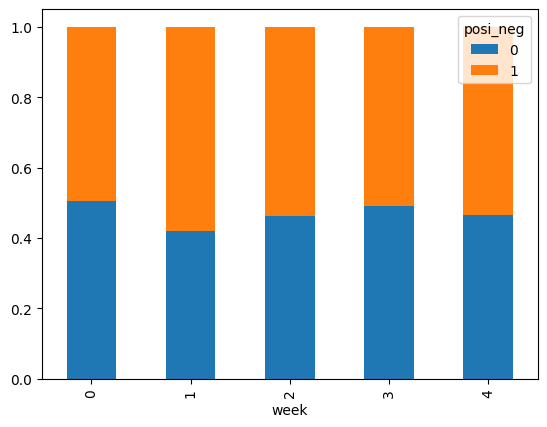

In [8]:
pro.plot(kind='bar', stacked=True)
plt.show()

## 使用pivot_table(透视表)实现

In [9]:
# 通过透视表，将整个过程变成更简单一些(不用求百分占比)
res = data.pivot_table(['posi_neg'], index='week')

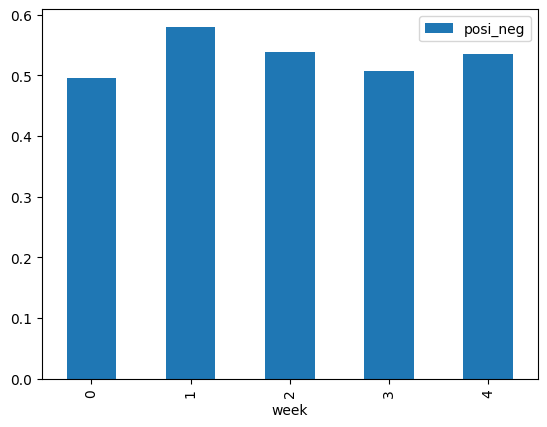

In [10]:
res.plot(kind='bar')
plt.show()